# 타이타닉 생존자/사망자 데이터로 분류 모델 학습하기

In [58]:
import pandas as pd
df = pd.read_csv("Data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
embarked_dic = {}
for i in df["Embarked"]:
    if i not in embarked_dic:
        embarked_dic[i] = len(embarked_dic)
df["Embarked"] = df["Embarked"].map(embarked_dic)         # map 써서 해당 딕셔너리로 대체

In [65]:
df = pd.read_csv("Data/titanic.csv")
df["Age"] = df["Age"].fillna(df["Age"].mean())      # Age의 누락값은 평균으로 대체

In [66]:
del df["Cabin"]

In [69]:
df["Embarked"] = df["Embarked"].fillna("?")        # 누락값 모른다고 채우기 - 텀퓨터가 모른다고 학습할 수 있게

In [70]:
df.info()
# PassengerID, Name, Ticket은 삭제하는 게 좋을 듯

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [71]:
del df["Name"]
del df["Ticket"]
del df["PassengerId"]

In [72]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [73]:
from sklearn.preprocessing import LabelEncoder       # 문자형을 숫자형을 바꿔줌
encoder = LabelEncoder()
df["Embarked"] = encoder.fit_transform(df["Embarked"])

In [75]:
encoder.classes_       # 뭐가 뭘의미하는지 확인가능
# 0이 ?, 1이 C, 2가 Q, 3이 S라는 뜻 

array(['?', 'C', 'Q', 'S'], dtype=object)

In [76]:
df["Sex"] = encoder.fit_transform(df["Sex"])
encoder.classes_

array(['female', 'male'], dtype=object)

In [78]:
X = df.drop("Survived", axis = 1)
Y = df["Survived"]

In [79]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y, stratify=Y)

In [80]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.neighbors import KNeighborsClassifier

ss = StandardScaler()
train_scaled = ss.fit_transform(train_x)
test_scaled = ss.transform(test_x)

In [82]:
model = KNeighborsClassifier()
model.fit(train_scaled, train_y)

KNeighborsClassifier()

In [85]:
box = []
for n in range(1, 31):
    model.n_neighbors = n
    score = model.score(test_scaled, test_y)
    print(n, score)
    box.append(score)

1 0.7892376681614349
2 0.7847533632286996
3 0.8116591928251121
4 0.8251121076233184
5 0.8430493273542601
6 0.8251121076233184
7 0.8430493273542601
8 0.8340807174887892
9 0.820627802690583
10 0.8251121076233184
11 0.8430493273542601
12 0.8251121076233184
13 0.8340807174887892
14 0.8251121076233184
15 0.8340807174887892
16 0.8251121076233184
17 0.8340807174887892
18 0.8251121076233184
19 0.8251121076233184
20 0.8340807174887892
21 0.8116591928251121
22 0.8295964125560538
23 0.820627802690583
24 0.8295964125560538
25 0.820627802690583
26 0.820627802690583
27 0.8116591928251121
28 0.8161434977578476
29 0.8161434977578476
30 0.8161434977578476


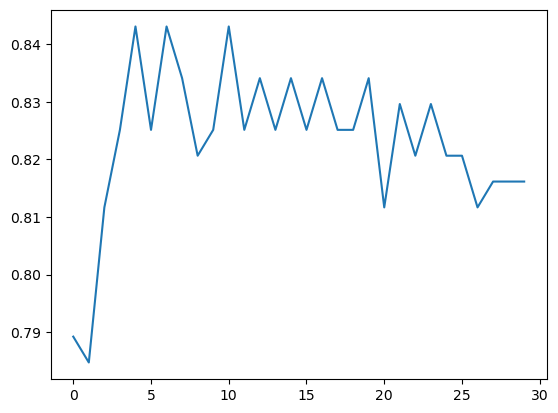

In [86]:
import matplotlib.pyplot as plt
plt.plot(box)
plt.show()

# 안정적인 성능보이는 이웃숫자 판단하려면 약간 정체된 구간에서 가운데 지점쯤을 뽑아주면 됨.. 약 15?

In [87]:
model.n_neighbors = 15

In [90]:
from sklearn.metrics import classification_report
pred = model.predict(test_scaled)
report = classification_report(test_y, pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       137
           1       0.85      0.70      0.76        86

    accuracy                           0.83       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.84      0.83      0.83       223

